In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/User/Documents/rainfall.csv')
data.head()

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0


isi dashboard:
- laporan kota mumbai dalam 4 tahun terakhir parameter yang dipaka adalah temp,dew, humidiy dan winspeed
- 5 top dari masing-masing parameter


In [2]:
data.isnull().sum()

datetime            0
temp                0
dew                 0
humidity            0
sealevelpressure    0
winddir             0
solarradiation      0
windspeed           0
precipprob          0
preciptype          0
dtype: int64

- data bersih tidak ada nilai yang hilang

In [3]:
### mengubah format datetime, error coerce jika ada format yang beda diisi NAN
data['datetime_for']=pd.to_datetime(data['datetime'],errors='coerce',format="%d-%m-%Y")
#detect incosistent index
incosistent=data[data['datetime_for'].isnull()]
index=incosistent.index.tolist()
#ubah index cincosistent ke datetime
data.loc[index,'datetime']=pd.to_datetime(data.loc[index,'datetime'])
#membuat kolom baru dengan format d m
data['datetime_m']=pd.to_datetime(data['datetime'],format='%d-%m-%Y').dt.strftime('%m')
from matplotlib import pyplot as plt
#musim pada mumbai
spring=pd.date_range(start='2016-03-01',end='2016-05-31',freq='D').strftime('%m').tolist()
summer=pd.date_range(start='2016-06-01',end='2016-08-30',freq='D').strftime('%m').tolist()
auntumn=pd.date_range(start='2016-09-01',end='2016-11-30',freq='D').strftime('%m').tolist()
winter=pd.date_range(start='2016-12-01',end='2017-02-28',freq='D').strftime('%m').tolist()
season={
    'spring':spring,
    'summer':summer,
    'auntumn':auntumn,
    'winter':winter
}
def map_season(x):
    for i,j in season.items():
        if x in j:
            return i
data['Season']=data['datetime_m'].apply(map_season)
data['datetime']=pd.to_datetime(data['datetime'],format='%d-%m-%Y')
data['year']=data['datetime'].dt.year
data.head()

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype,datetime_for,datetime_m,Season,year
0,2016-01-01,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0,2016-01-01,01,winter,2016
1,2016-01-02,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0,2016-01-02,01,winter,2016
2,2016-01-03,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0,2016-01-03,01,winter,2016
3,2016-01-04,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0,2016-01-04,01,winter,2016
4,2016-01-05,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0,2016-01-05,01,winter,2016


- Prepare data

In [14]:
param_wet=['temp','humidity','windspeed','dew']
kum_data={}
for l in param_wet:
    pivot_temp=data.pivot_table(index='year',columns='Season',values=l,aggfunc='mean')
    data_temp=pivot_temp.copy()
    kol=data_temp.columns.tolist()
    #membuat var dataframe
    data_temp=data_temp.reset_index(drop=True)
    
    var={}
    #hitunh selisih setelah ke sebelum
    for i,j in data_temp.iterrows():
        if i!=0:
            li=[]
        
            for k in kol:
                vaor=((data_temp.loc[i,k]-data_temp.loc[i-1,k])/data_temp.loc[i-1,k])*100
                li.append(vaor)
            var[i]=li
    #format ke dataframe dengan index
    datakum=pd.DataFrame(list(var.values()),index=var.keys(),columns=kol)
    datakum.index=['2016 vs 2017','2017 vs 2018','2018 vs 2019','2019 vs 2020']
    kum_data[l]=datakum

2017 vs 2018


- prepare data 2

In [56]:
get_data={}
for i in param_wet:
    sort_data=data.sort_values(by=i,ascending=False)
    sort_data['datetime']=sort_data['datetime'].dt.strftime('%Y-%m-%d')
    top_5=sort_data[[i,'datetime','Season']].head(5)
    get_data[i]=top_5
get_data

{'temp':       temp    datetime  Season
 1571  32.8  2020-04-20  spring
 1179  32.5  2019-03-25  spring
 815   32.4  2018-03-26  spring
 1612  32.3  2020-05-31  spring
 451   32.3  2017-03-27  spring,
 'humidity':       humidity    datetime   Season
 1727      98.2  2020-09-23  auntumn
 1646      97.2  2020-07-04   summer
 1657      97.2  2020-07-15   summer
 1658      96.5  2020-07-16   summer
 1277      96.2  2019-07-01   summer,
 'windspeed':       windspeed    datetime   Season
 1689      128.1  2020-08-16   summer
 927       116.7  2018-07-16   summer
 1356       92.5  2019-09-18  auntumn
 1258       77.0  2019-06-12   summer
 1004       76.9  2018-10-01  auntumn,
 'dew':        dew    datetime   Season
 1710  27.5  2020-09-06  auntumn
 891   27.3  2018-06-10   summer
 892   27.0  2018-06-11   summer
 1747  27.0  2020-10-13  auntumn
 1283  26.9  2019-07-07   summer}

- membuat dashboard

[]

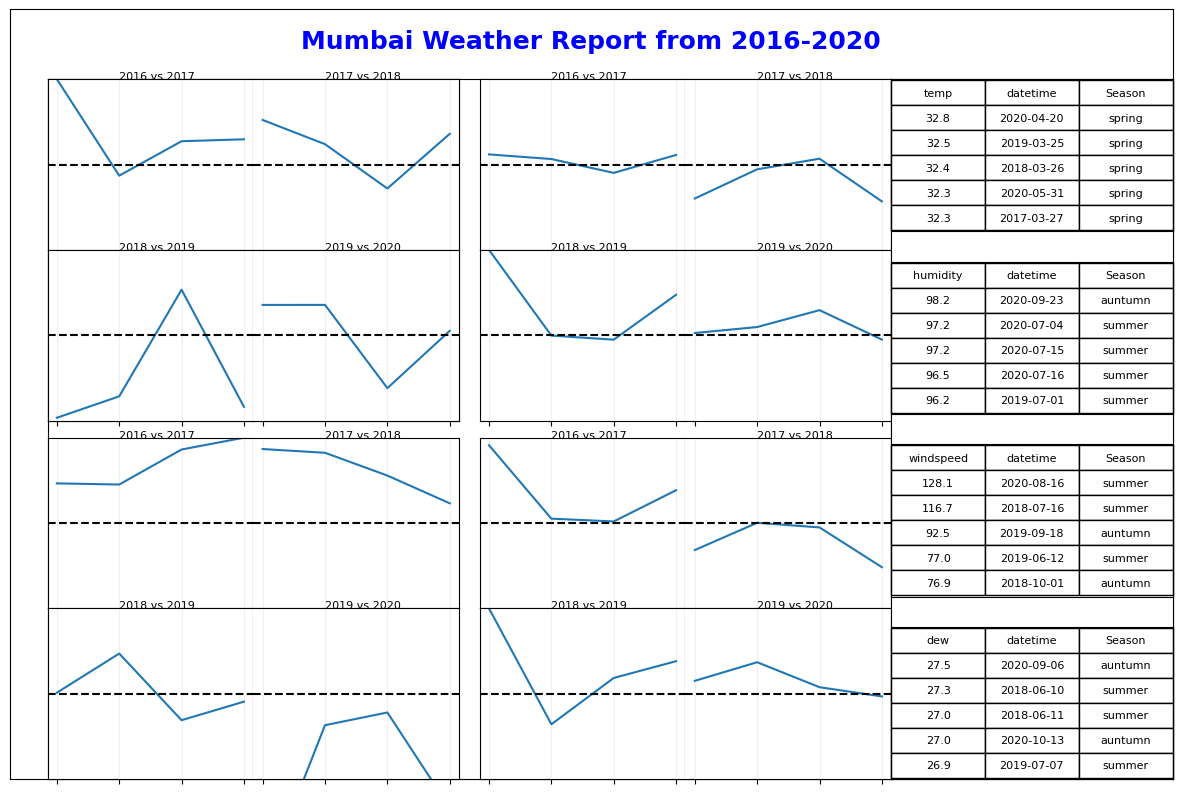

In [90]:
from matplotlib import pyplot as plt
fig,ax0=plt.subplots(figsize=(15,10))
ax0.set_facecolor('white')
ax0.yaxis.set_visible(False)
ax0.xaxis.set_visible(False)
import matplotlib.gridspec as gridspec
gs=gridspec.GridSpec(2,3,height_ratios=[0,1.5])
ax0.text(0.25,0.95,'Mumbai Weather Report from 2016-2020',fontweight='bold',fontsize=18,color='blue')

gs_1=gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs[1,:],width_ratios=[0.75,0.25],hspace=0,wspace=0)
gs.update(left=0.15)

ax1=fig.add_subplot(gs_1[0])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
#box 1 ada 4 subox
gs_2=gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=gs_1[0],width_ratios=[0.5,0.5],hspace=0.05,wspace=0.05)
ax_inner=fig.add_subplot(gs_2[0])
ax_inner.set_xticklabels([])
ax_inner.set_yticklabels([])
ax_inner.set_xticks([])
ax_inner.set_yticks([])
#dalam box ke 1 ada 4 subplot
for k,l in zip(range (4),kum_data.values()):
    gs_inner=gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=gs_2[k],width_ratios=[0.5,0.5],hspace=0,wspace=0)
    axes=[fig.add_subplot(gs_inner[i]) for i in range(4) ]
    for i,j in zip(range(4),axes):
        j.plot(l.iloc[i,:])
        j.axhline(y=0,linestyle='--',color='black')
        nilai_min=-1*max(l.max())
        nilai_max=max(l.max())
        j.set_ylim(nilai_min,nilai_max)
        j.set_yticks([])
        j.set_xticklabels([])
        
        j.grid(axis='x',alpha=0.2)
        kol=['a','sp','su','wi']
        xkor=j.get_xticks()
        if i==3 or i==1:
            j.spines['left'].set_visible(False)
        j.text(1,nilai_max,l.iloc[i,:].name,fontsize=8)
        
#box isi top 5 masing-masing parameter
ax2=fig.add_subplot(gs_1[1])
gs_inner2=gridspec.GridSpecFromSubplotSpec(4,1,subplot_spec=gs_1[1],height_ratios=[0.25,0.25,0.25,0.25])
axes2=[fig.add_subplot(gs_inner2[i]) for i in range(4) ]
for i,j in zip(axes2,get_data.values()):
    tb=i.table(cellText=j.values,colLabels=j.columns,loc='center')
    #mengubah ukuran table
    tb.scale(1,1.5)
    #mengubah ukuran size
    tb.auto_set_font_size(False)
    tb.set_fontsize(8)
    #align center dan menghilangkan border
    for (k,l),m in tb.get_celld().items():
        m.set_text_props(ha='center')
        
    i.set_xticks([])
    i.set_yticks([])
    i.set_xticklabels([])
    i.set_yticklabels([])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])